# Distinguishing Adult and Youth Faces Using Convolutional Neural Networks


## Notebook CNN4: Second Convolutional Neural Network
This section details the development of a Convolutional Neural Network (CNN) that introduces an additional hidden layer and significantly increases the dropout rates to further mitigate overfitting. In this model, higher dropout rates are applied to reduce the risk of the model becoming overly specialized to the training data. While this approach effectively reduces overfitting, it also results in lower overall accuracy, suggesting that the model may have been excessively regularized, impeding its learning ability. Additionally, the F1 score for CNN 4 is 0.6, indicating a moderate balance between precision and recall. This score reflects significant misclassifications, implying a notable number of false positives and false negatives in the confusion matrix. Future iterations will focus on optimizing regularization parameters to improve the model's performance and achieve a better balance between overfitting and underfitting.
### Important Considerations
* These models require significant computing power. Each took 10 hours to fit using an M3 chip and 18GB of memory.
* Consider making a separate keras environment
* Consider working in GoogleColab


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.utils import compute_class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG19

import keras
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import f1_score, roc_curve, roc_auc_score

In [2]:
data_dir = '/Users/marta/Documents/data_dir/'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size = 32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size = 32)

Found 14633 files belonging to 2 classes.
Using 11707 files for training.
Found 14633 files belonging to 2 classes.
Using 2926 files for validation.


In [3]:
# Helped by Argishti Ovsepyan 
classes = np.array(['PLP', 'POR'])
y = [classes[0]] * 5422 + [classes[1]] * 9211
class_weights = compute_class_weight('balanced', classes=classes, y=y)

class_weights_dict = class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
class_weights_dict

{0: 1.349409811877536, 1: 0.794322006296819}

In [6]:
from tensorflow.keras.layers import Dropout

# Add dropout layers
cnn4 = Sequential()

cnn4.add(Conv2D(512, 3, activation='relu', input_shape=(256, 256, 3)))
cnn4.add(MaxPooling2D(2, padding='same'))
cnn4.add(Dropout(0.5))

cnn4.add(Conv2D(256, 3, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
cnn4.add(MaxPooling2D(2, padding='same'))
cnn4.add(Dropout(0.5))

cnn4.add(Conv2D(256, 3, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
cnn4.add(MaxPooling2D(2, padding='same'))
cnn4.add(Dropout(0.5))

cnn4.add(Conv2D(256, 3, activation='relu', kernel_regularizer=regularizers.l2(0.03)))
cnn4.add(MaxPooling2D(2, padding='same'))
cnn4.add(Dropout(0.5))

cnn4.add(Flatten())
cnn4.add(Dense(1, activation='sigmoid'))

cnn4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history4 = cnn4.fit(train_ds, epochs=10, validation_data=val_ds, class_weight=class_weights_dict)


Epoch 1/10


2024-06-11 21:21:02.430662: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [11707]
	 [[{{node Placeholder/_0}}]]
2024-06-11 21:21:02.430820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype double and shape [2]
	 [[{{node Placeholder/_17}}]]
2024-06-11 21:21:02.438845: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


366/366 [==============================] - ETA: 0s - loss: 18.3909 - acc: 0.5266

2024-06-11 22:18:26.550108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2926]
	 [[{{node Placeholder/_0}}]]
2024-06-11 22:18:26.550235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2926]
	 [[{{node Placeholder/_0}}]]


366/366 [==============================] - 3655s 10s/step - loss: 18.3909 - acc: 0.5266 - val_loss: 9.5408 - val_acc: 0.6237
Epoch 2/10
366/366 [==============================] - 3652s 10s/step - loss: 6.4428 - acc: 0.5563 - val_loss: 4.2146 - val_acc: 0.6237
Epoch 3/10
366/366 [==============================] - 3738s 10s/step - loss: 3.0466 - acc: 0.5832 - val_loss: 2.1743 - val_acc: 0.6237
Epoch 4/10
366/366 [==============================] - 3771s 10s/step - loss: 1.7066 - acc: 0.5466 - val_loss: 1.3493 - val_acc: 0.4751
Epoch 5/10
366/366 [==============================] - 3786s 10s/step - loss: 1.1444 - acc: 0.5688 - val_loss: 0.9667 - val_acc: 0.5390
Epoch 6/10
366/366 [==============================] - 3752s 10s/step - loss: 0.8734 - acc: 0.5882 - val_loss: 0.7726 - val_acc: 0.6141
Epoch 7/10
366/366 [==============================] - 3778s 10s/step - loss: 0.7428 - acc: 0.5910 - val_loss: 0.7077 - val_acc: 0.5964
Epoch 8/10
366/366 [==============================] - 3849s 11s/s

In [4]:
cnn4.save('./saved_models/cnn4.h5')
pd.DataFrame(history4.history).to_csv('./saved_models//history4.csv', index=False)

NameError: name 'cnn4' is not defined

In [ ]:
#### Check out the plot of loss vs epoch.
plt.figure(figsize = (12, 6));

plt.subplot(1,2,1)
plt.plot(history4.history['loss'], c = 'navy', label = 'Training Loss');
plt.plot(history4.history['val_loss'], c = 'orange', label = 'Testing Loss');

plt.title('''CNN 4 :
Binary Crossentropy (loss function),
as a Function of Epochs''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(1, 2, 2)
plt.plot(history4.history['acc'], c = 'navy', label = 'Training Accuracy');
plt.plot(history4.history['val_acc'], c = 'orange', label = 'Testing Accuracy');
plt.title('''CNN 4: 
Accuracy Score 
as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();

---
## Loading the Model to Analyze Metrics

Saving the model in a way that can store the weights and history allows us to make predictions without having to fit the model again.
The CNN has a single output node for a binary classification model. The CNN will predict the probabilities for the validation set, which will be between zero and one. The predicted probabilities are thresholded at 0.5 to convert them to class labels (0 or 1). Boolean values are returned; now the output is binary. 


In [ ]:
# Load the saved model & training history
cnn4 = load_model('./saved_models/cnn4_saved_model/cnn4.h5')
history4 = pd.read_csv('./saved_models/cnn4_saved_model/history4.csv')

# Get the true labels from the validation dataset
y_true = []
for images, labels in val_ds:     # val_ds => validation data set
    y_true.extend(labels.numpy()) # extend apends elements, .apends() appends entire array as single element

y_true = np.array(y_true)        

# Predict the probabilities for the validation set
y_pred_probs = cnn4.predict(val_ds, verbose=0)         #storing predictions as floats 0-1

# Convert probabilities to class labels
y_pred_classes = (y_pred_probs > 0.5).astype("int32")  #storing predictions as binary classes

# Calculate the F1 score
f1 = f1_score(y_true, y_pred_classes)
print(f"F1 Score: {f1:.4f}")

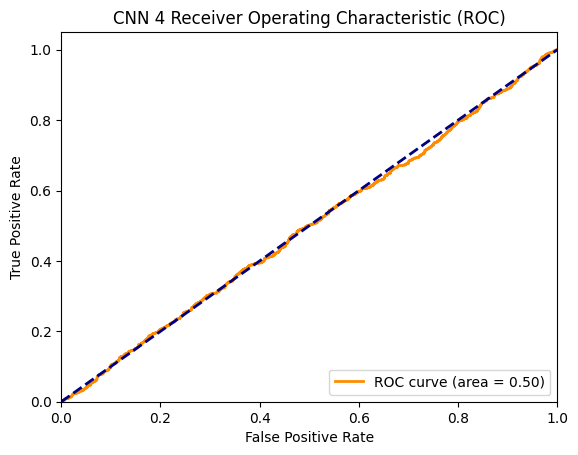

In [22]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = roc_auc_score(y_true, y_pred_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #baseline of AUC = 0.5
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN 4 Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

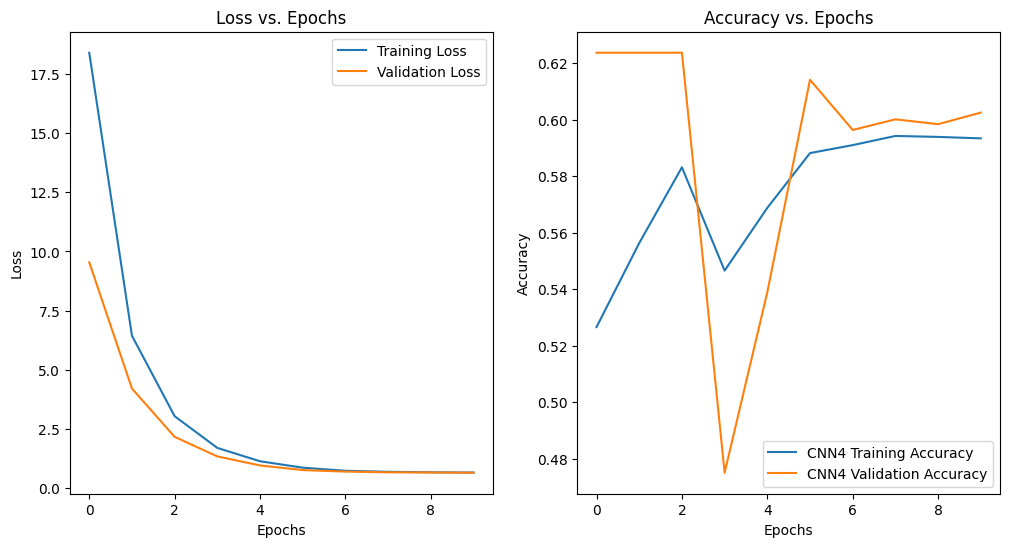

In [21]:
# Plot the training and validation loss and accuracy curves
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['acc'], label='CNN4 Training Accuracy')
plt.plot(history['val_acc'], label='CNN4 Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

**CNN 4**: This model increased the dropout rates to further mitigate overfitting. Although this approach successfully reduced overfitting, it resulted in lower overall accuracy, suggesting that the model may have been overly regularized. This excessive regularization likely hindered the model's ability to learn effectively. The ROC curve and AUC indicate that the model's True Positive Rate is suboptimal, highlighting significant limitations in its predictive performance. Additionally, the F1 score for CNN 4 is 0.6, which implies a balanced performance between precision and recall. However, this score also reflects moderate precision and recall, suggesting that the model has significant misclassifications. In a confusion matrix, this means the model has a notable number of both false positives and false negatives, further underscoring the need for better optimization.